In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =  pd.read_csv("C:/Users/madhu/Downloads/FinMan/Train.csv")
desc = pd.read_csv('C:/Users/madhu/Downloads/FinMan/Train_data_dictionary.csv')

### Basic Understanding of the Data

In [25]:
desc

,Variable,Definition
0,ID,Unique Identifier for a row
1,City_Code,Code for the City of the customers
2,Region_Code,Code for the Region of the customers
3,Accomodation_Type,Customer Owns or Rents the house
4,Reco_Insurance_Type,Joint or Individual type for the recommended i...
5,Upper_Age,Maximum age of the customer
6,Lower _Age,Minimum age of the customer
7,Is_Spouse,If the customers are married to each other
8,NaN,(in case of joint insurance)
9,Health_Indicator,Encoded values for health of the customer


In [2]:
df.head(15)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [3]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [6]:
df.Is_Spouse.value_counts()

Is_Spouse
No     42460
Yes     8422
Name: count, dtype: int64

In [7]:
df['Health Indicator'].value_counts()

Health Indicator
X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: count, dtype: int64

### Imputing Null Values and Reasons

In [8]:
# Holding_Policy_Duration
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].str.rstrip('+')  # Remove the '+' at the end
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'], errors='coerce')  # Convert to numeric, treating errors as NaN
df['Holding_Policy_Duration'].fillna(0, inplace=True)  # Replace NaN values with 0
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(float)  # Convert to float

# Check the transformed column
print(df['Holding_Policy_Duration'])

0        14.0
1         0.0
2         1.0
3        14.0
4         3.0
         ... 
50877     0.0
50878     7.0
50879    14.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: float64


In [9]:
df['Holding_Policy_Type'].fillna(0, inplace=True)  # Replace NaN values with 0
# Check the transformed column
print(df['Holding_Policy_Type'].head())

0    3.0
1    0.0
2    1.0
3    3.0
4    1.0
Name: Holding_Policy_Type, dtype: float64


Mapping missing values in Holding policy duration and Holding policy type to 0 as it can be understood that null values in both the mentioned columns can be due to the customer having no policy or the customer has just taken the policy and has not completed a year.

In [10]:
df['Health Indicator'].fillna('X0', inplace=True)
# Check the transformed column
print(df['Health Indicator'].head())

0    X1
1    X2
2    X0
3    X1
4    X2
Name: Health Indicator, dtype: object


Missing values in Health indicator are imputed with X0 , indicating X0 as missing value.

In [11]:
df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Handling Outliers

In [22]:
import pandas as pd

# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the IQR for each numerical column
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define a threshold for identifying outliers
    threshold = 1.5  # You can adjust this threshold based on your criteria
    
    # Identify outliers using the IQR method
    outliers = ((df[column] < (q1 - threshold * iqr)) | (df[column] > (q3 + threshold * iqr)))
    
    # Display the column name and the count of outliers
    print(f"Column: {column}, Outliers Count: {outliers.sum()}")


Column: ID, Outliers Count: 0
Column: Region_Code, Outliers Count: 201
Column: Upper_Age, Outliers Count: 0
Column: Lower_Age, Outliers Count: 0
Column: Holding_Policy_Duration, Outliers Count: 0
Column: Holding_Policy_Type, Outliers Count: 0
Column: Reco_Policy_Cat, Outliers Count: 0
Column: Reco_Policy_Premium, Outliers Count: 821
Column: Response, Outliers Count: 12209


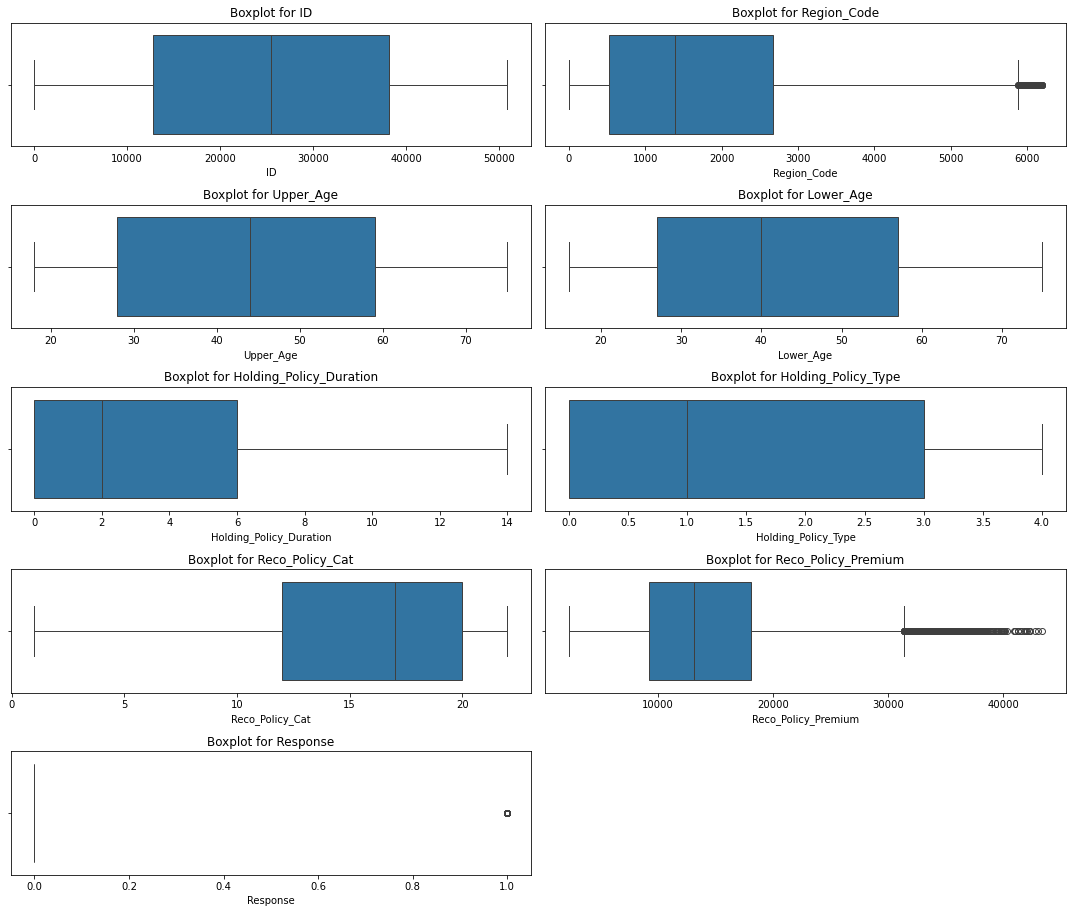

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set the size of the plot
plt.figure(figsize=(15, 25))

# Create boxplots for each numerical variable using iteration
for column in numerical_columns:
    plt.subplot(10,2, numerical_columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
